# Data Loading

In [35]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv("./data_public.csv")

# Data processing

## Data overview

In [37]:
# Check first few rows
print(data.head())

# General information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1  -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2  -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3  221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4  228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   

            G           H          I           J           K         L  \
0  131.591871  198.160805  82.873279  127.350084  224.592926 -5.992983   
1   -0.094457  -33.711852  -8.356041   23.792402    4.199023  2.809159   
2   -2.953836  -25.299219  -6.612401   26.285392    5.911292  6.191587   
3  108.857593  197.640135  82.560019  157.105143  212.989231 -3.621070   
4  115.598954  209.300011  89.961688  130.299732  201.795100 -1.573922   

           M           N           O  Class  
0 -14.689648  143.072058  153.439659      3  
1 -59.330681  -11.

## Data Issue

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Display basic statistics and missing values
print("Initial data statistics:")
print(data.describe())
print("\nMissing values in each column:")
print(data.isnull().sum())

# Checking for missing values in the dataset
missing_data = data.isnull().sum()

# Display the count of missing values per column
missing_data

Initial data statistics:
                  A             B             C             D             E  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   5.068656e+01 -1.883373e+01  7.162152e+01 -1.355120e+01  2.944177e+01   
std    1.292492e+02  1.446355e+01  1.052808e+02  4.689774e+01  7.282278e+01   
min   -7.308940e+01 -8.322357e+01 -5.972853e+01 -1.375818e+02 -3.829826e+01   
25%   -3.793679e+01 -1.786669e+01  7.553164e+00 -1.471337e+01 -2.436286e+01   
50%   -3.197847e+01 -1.369876e+01  1.348796e+01 -8.004308e+00 -1.897058e+01   
75%    2.280020e+02 -1.055606e+01  2.123439e+02  1.955806e+01  1.289018e+02   
max    2.687738e+02  4.460108e+00  2.561698e+02  3.263799e+01  1.579843e+02   

                  F             G             H             I             J  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean  -6.185189e+00  3.174186e+01  5.112504e+01  3.300077e+01  4.092546e+01   
std    7.309100e+01  6.660

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

## Assumption/Adjustments

In [41]:
# Handling missing values
# Using mean imputation as the strategy
imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(data.iloc[:, :-1])  # Exclude the target column if it's the last one
data.iloc[:, :-1] = data_filled  # Reassign cleaned data back to DataFrame excluding target column

print("\nData after imputation:")
print(pd.DataFrame(data_filled, columns=data.columns[:-1]).head())  # Show first few rows after imputation


Data after imputation:
            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1  -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2  -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3  221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4  228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   

            G           H          I           J           K         L  \
0  131.591871  198.160805  82.873279  127.350084  224.592926 -5.992983   
1   -0.094457  -33.711852  -8.356041   23.792402    4.199023  2.809159   
2   -2.953836  -25.299219  -6.612401   26.285392    5.911292  6.191587   
3  108.857593  197.640135  82.560019  157.105143  212.989231 -3.621070   
4  115.598954  209.300011  89.961688  130.299732  201.795100 -1.573922   

           M           N           O  
0 -14.689648  143.072058  153.439659  
1 -59.33

In [43]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])  # Scaling the features excluding the target column
data.iloc[:, :-1] = data_scaled  # Reassign scaled data back to DataFrame excluding target column

# Show the scaled data
print("\nScaled data:")
print(pd.DataFrame(data_scaled, columns=data.columns[:-1]).head())  # Show first few rows of scaled data



Scaled data:
          A         B         C         D         E         F         G  \
0  1.398333  0.457892  1.386800 -0.043941  1.518831  1.136805  1.499176   
1 -0.686316  0.320671 -0.589262  0.764323 -0.755534 -0.166762 -0.477999   
2 -0.695429 -0.109594 -0.480605  0.710940 -0.759987 -0.177913 -0.520931   
3  1.322591  0.902156  1.378256  0.077838  1.336854  1.249231  1.157837   
4  1.376193  0.441525  1.263438  0.005832  1.503497  1.331041  1.259054   

          H         I         J         K         L         M         N  \
0  1.421937  1.182621  1.123217  1.531100  0.048383  1.542774  1.390885   
1 -0.820431 -0.980689 -0.222670 -0.792750  0.613532 -0.949550 -0.909245   
2 -0.739075 -0.939343 -0.190270 -0.774695  0.830704 -0.815240 -0.805046   
3  1.416902  1.175193  1.509929  1.408750  0.200674  1.499253  1.274864   
4  1.529661  1.350708  1.161552  1.290718  0.332113  1.518267  1.469607   

          O  
0  1.402222  
1 -0.875843  
2 -0.910959  
3  1.338920  
4  1.313165  


# Data Analysis

## Data Summary

In [45]:
# Display summary statistics for each feature
print(data.describe())

                  A             B             C             D             E  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean  -5.803358e-17 -1.947242e-16  3.015188e-16  1.898452e-16  9.588182e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -9.576537e-01 -4.451873e+00 -1.247617e+00 -2.644705e+00 -9.302043e-01   
25%   -6.856782e-01  6.686056e-02 -6.085477e-01 -2.478078e-02 -7.388438e-01   
50%   -6.395787e-01  3.550282e-01 -5.521766e-01  1.182764e-01 -6.647971e-01   
75%    1.371888e+00  5.723130e-01  1.336639e+00  7.059888e-01  1.365782e+00   
max    1.687340e+00  1.610521e+00  1.752916e+00  9.848922e-01  1.765142e+00   

                  F             G             H             I             J  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   1.018445e-17  9.955888e-17 -1.136868e-18  6.525151e-17 -1.110105e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

## extended summary

In [47]:
# Import necessary library for advanced statistics
from scipy.stats import skew, kurtosis

# Calculating skewness and kurtosis along with descriptive statistics
advanced_stats = data.describe()
advanced_stats.loc['skew'] = data.skew()
advanced_stats.loc['kurtosis'] = data.kurtosis()

print(advanced_stats)

                     A             B             C             D  \
count     1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean     -5.803358e-17 -1.947242e-16  3.015188e-16  1.898452e-16   
std       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min      -9.576537e-01 -4.451873e+00 -1.247617e+00 -2.644705e+00   
25%      -6.856782e-01  6.686056e-02 -6.085477e-01 -2.478078e-02   
50%      -6.395787e-01  3.550282e-01 -5.521766e-01  1.182764e-01   
75%       1.371888e+00  5.723130e-01  1.336639e+00  7.059888e-01   
max       1.687340e+00  1.610521e+00  1.752916e+00  9.848922e-01   
skew      6.911328e-01 -1.675654e+00  6.036502e-01 -1.414206e+00   
kurtosis -1.489856e+00  1.481542e+00 -1.458697e+00  5.371229e-01   

                     E             F             G             H  \
count     1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean      9.588182e-17  1.018445e-17  9.955888e-17 -1.136868e-18   
std       1.000000e+00  1.000000e+00  1.000000e

## Vizualization

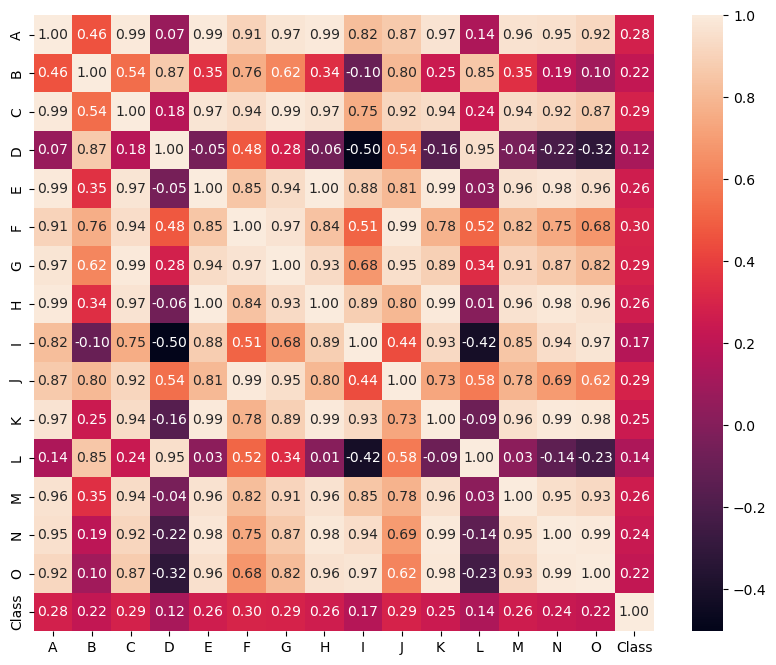

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

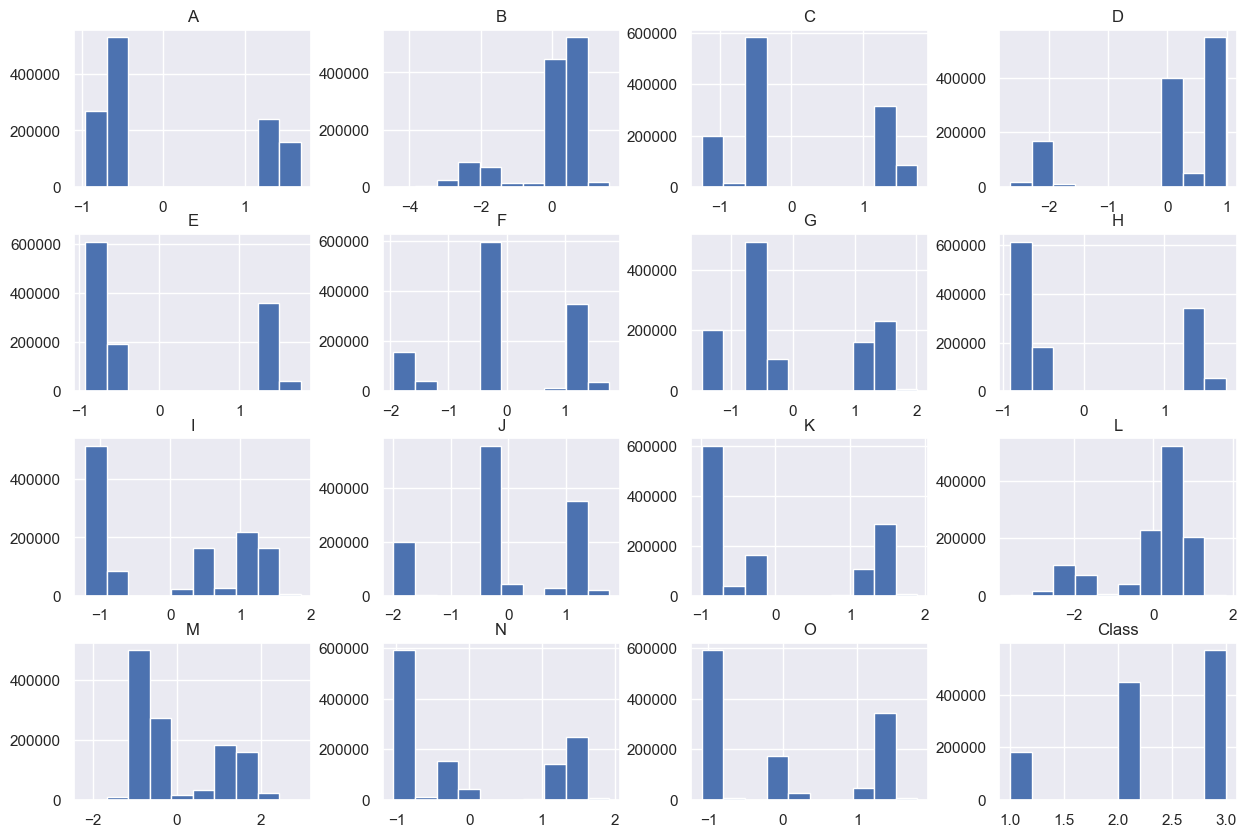

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters for seaborn
sns.set()

# Histograms for each feature
data.hist(figsize=(15, 10))
plt.show()

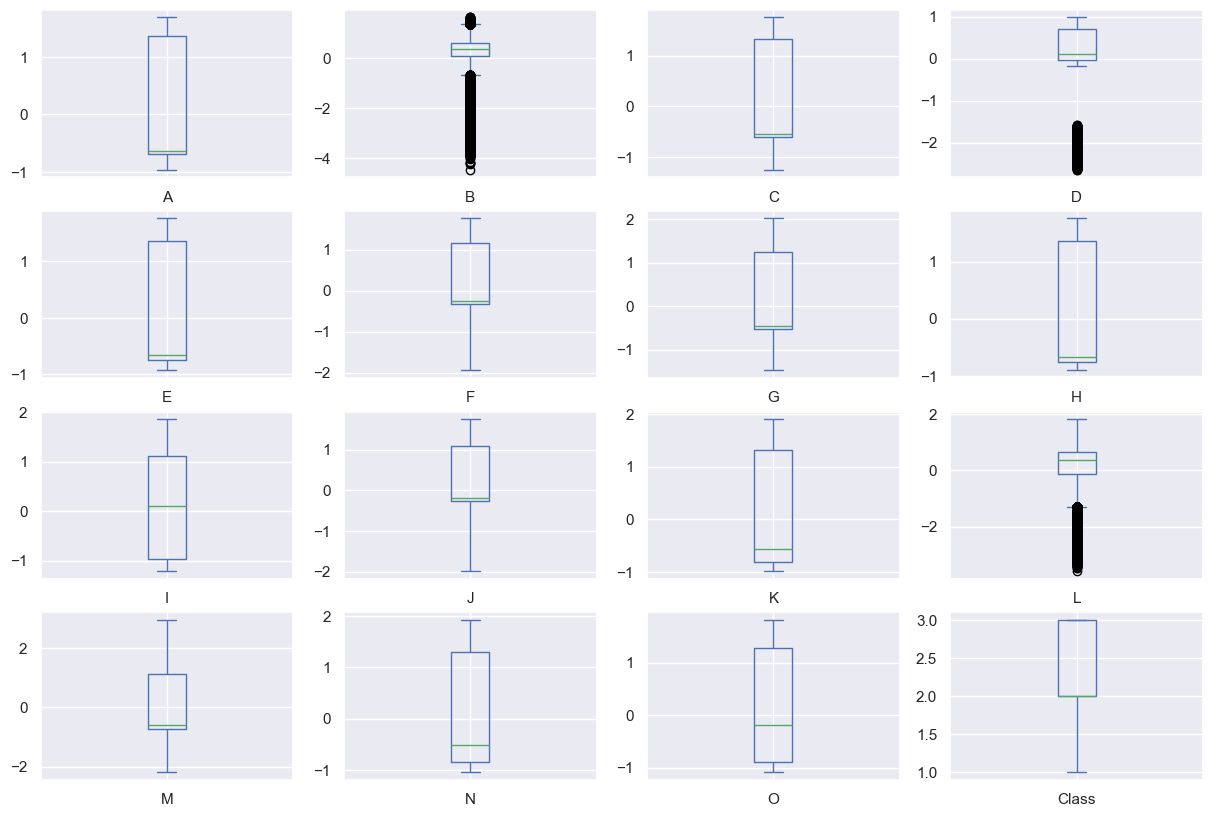

In [53]:
# Box plots for each feature
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()

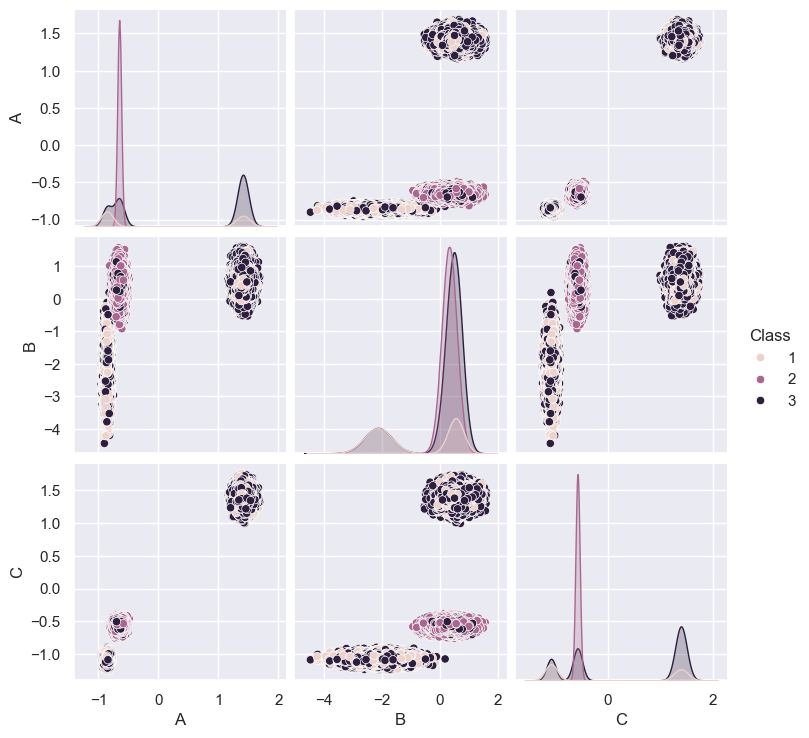

In [55]:
# Scatter plot example between two features
sns.pairplot(data[['A', 'B', 'C', 'Class']], hue='Class')
plt.show()

## Feature Extraction

### Principal Component Analysis (PCA)

In [57]:
from sklearn.decomposition import PCA

# Assume data is already scaled and does not include the target variable
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(data)

# Now principal_components can be used as input for your model

### Automatic Feature Selection

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

target = data['A']

# Define the features (all other columns except 'Class')
features = data.drop(columns=['Class'])

# Initialize the linear regression model
model = LinearRegression()

# Set up RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(features, target)

# Show selected features
selected_features = features.columns[fit.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['A', 'B', 'C', 'D', 'F', 'G', 'I', 'K', 'M', 'N'], dtype='object')


# Feature Engineering

In [61]:
# Create interaction terms for a few features as an example
data['AB_interaction'] = data['A'] * data['B']
print(data['AB_interaction'])

0          0.640286
1         -0.220081
2          0.076215
3          1.193184
4          0.607624
             ...   
1199995   -0.335602
1199996   -0.186749
1199997    0.135910
1199998    1.349755
1199999    1.321750
Name: AB_interaction, Length: 1200000, dtype: float64


In [63]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95)
data_reduced = pca.fit_transform(data.drop('Class', axis=1))  # Assuming 'Class' is the target
print(data_reduced)

[[ 4.80630017 -0.250344  ]
 [-2.31509177  1.59436896]
 [-2.22782618  1.35971269]
 ...
 [ 4.62840364  0.0727894 ]
 [-2.80263455 -3.83704017]
 [ 4.51697838 -0.32140097]]


# Model Selection

## Linear Regression

In [65]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Splitting features and target variable
X = data.drop(columns='Class')  # Replace 'Class' with your target variable if different
y = data['Class']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.48
R-squared: 0.09


## Visualization

### Scatter Plot

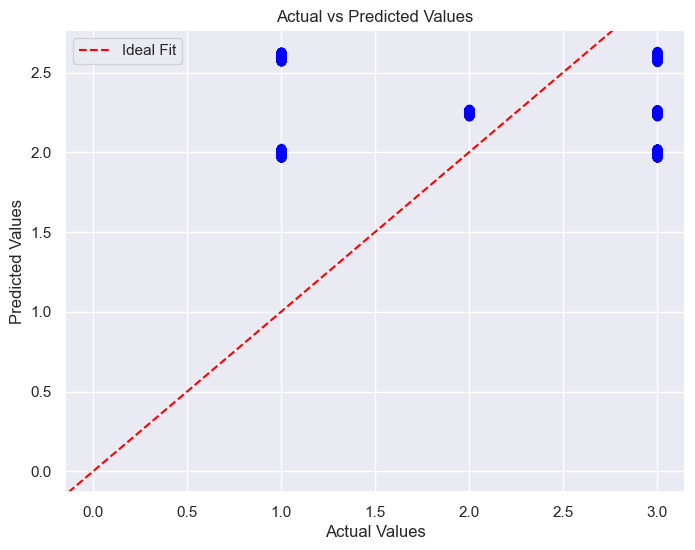

In [67]:
# Scatterplot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.axline([0, 0], slope=1, color="red", linestyle="--", label="Ideal Fit")
plt.legend()
plt.show()

### Bar Plot

           Feature  Coefficient
0                A     0.032659
1                B     0.004355
2                C     0.030102
3                D     0.036595
4                E     0.042434
5                F     0.030208
6                G     0.012881
7                H     0.032860
8                I    -0.004396
9                J     0.031424
10               K     0.009390
11               L     0.004022
12               M     0.001025
13               N    -0.006936
14               O    -0.008197
15  AB_interaction    -0.003085


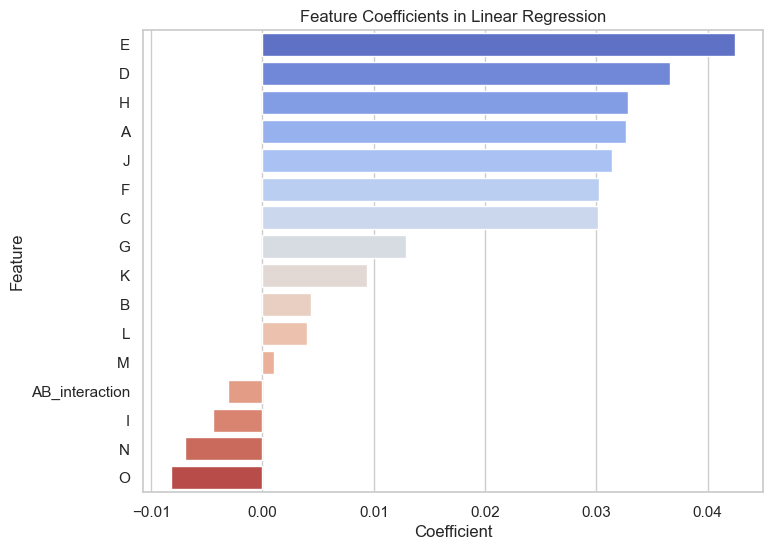

In [69]:
import seaborn as sns

# Example visualization using seaborn
sns.set_theme(style="whitegrid")  

# Display model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coefficients)

# Plot coefficients
plt.figure(figsize=(8, 6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
sns.barplot(x='Coefficient', y='Feature', hue='Feature', data=coefficients, palette="coolwarm")
plt.title("Feature Coefficients in Linear Regression")
plt.show()

## KNN 

In [71]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = data.drop(columns=["Class"])  # Features (Columns A to O)
y = data["Class"]                # Target (Column Class)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Assuming X and y are already defined as features and target
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Define the KNN model
knn_model = KNeighborsClassifier()

# Create a pipeline for KNN
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Preprocessing
    ("model", knn_model)           # KNN model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
print("--- K-Nearest Neighbors (KNN) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Features shape: (1200000, 16)
Target shape: (1200000,)
Train set shape: (960000, 16)
Test set shape: (240000, 16)
--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.6867
Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.31      0.36     36189
           2       0.75      0.90      0.82     89845
           3       0.68      0.64      0.66    113966

    accuracy                           0.69    240000
   macro avg       0.62      0.61      0.61    240000
weighted avg       0.67      0.69      0.67    240000



## Visualization

### Confusion Matrix

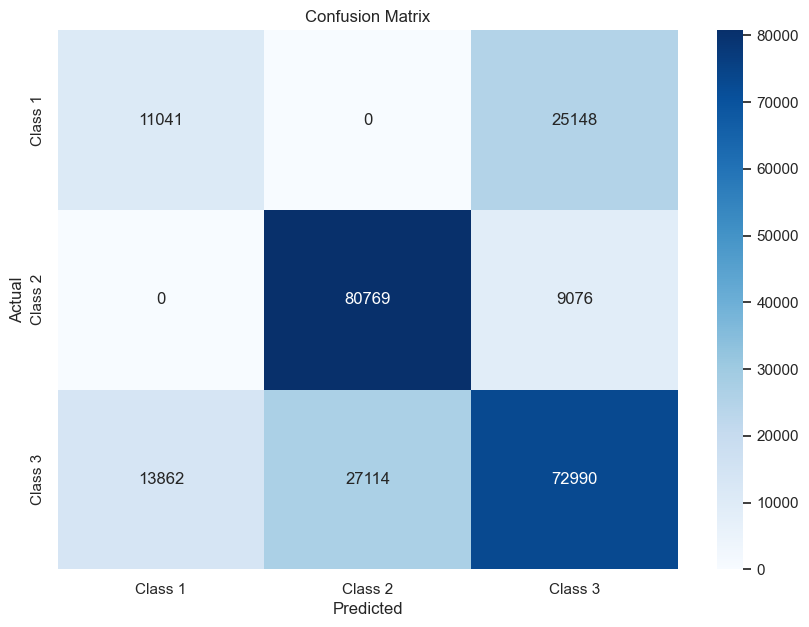

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

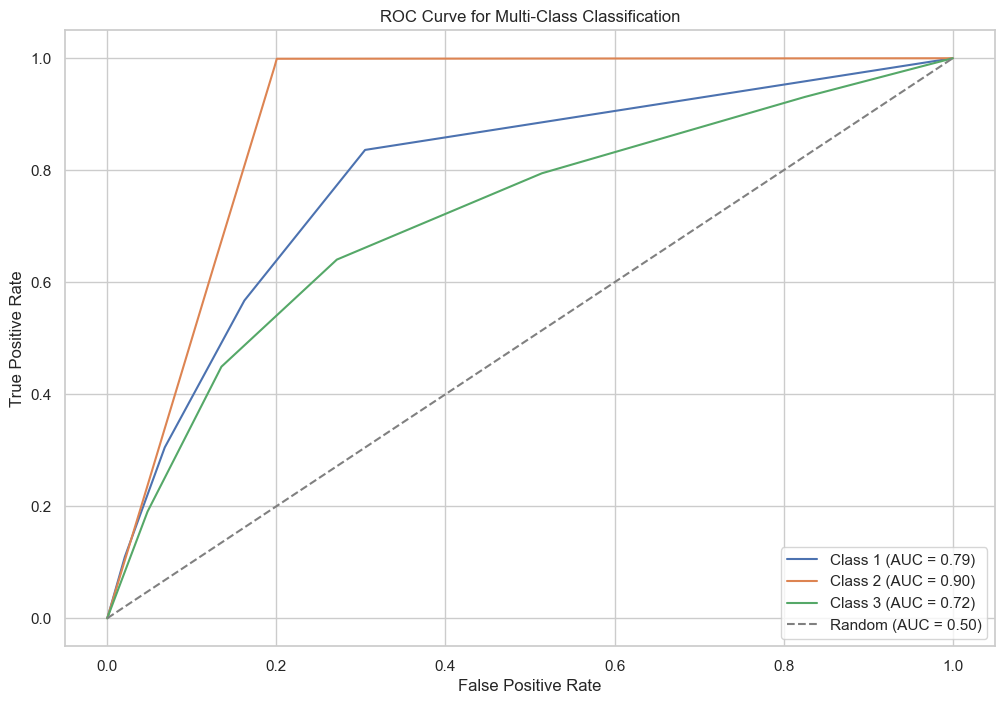

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_pred_prob = pipeline.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.50)')
plt.title("ROC Curve for Multi-Class Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Naive Bayes model

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define features and target
X = data.drop(columns=["Class"])  # Features (Columns A to O)
y = data["Class"]                # Target (Column Class)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Assuming X and y are already defined as features and target
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Define the Naive Bayes model
nb_model = GaussianNB()

# Create a pipeline for Naive Bayes
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Preprocessing
    ("model", nb_model)            # Naive Bayes model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
print("--- Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Features shape: (1200000, 16)
Target shape: (1200000,)
Train set shape: (960000, 16)
Test set shape: (240000, 16)
--- Naive Bayes ---
Accuracy: 0.7241


## Visualization

###  Precision-Recall Curve

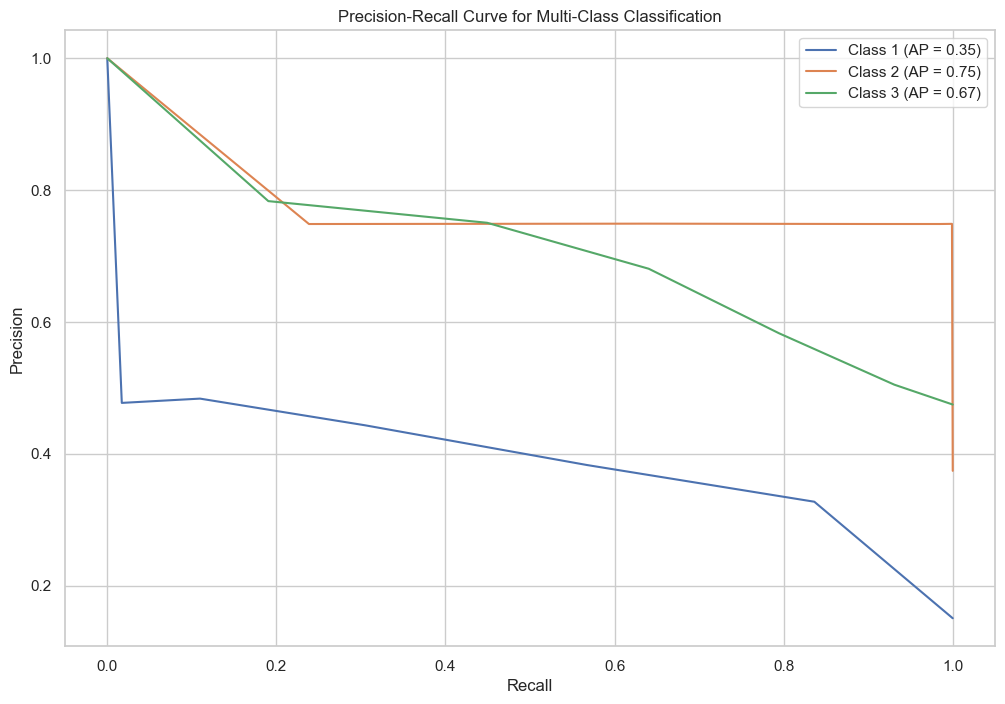

In [81]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve for each class
plt.figure(figsize=(12, 8))
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i+1} (AP = {average_precision_score(y_test_bin[:, i], y_pred_prob[:, i]):.2f})')

plt.title("Precision-Recall Curve for Multi-Class Classification")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

### Histogram of Predicted Probabilities

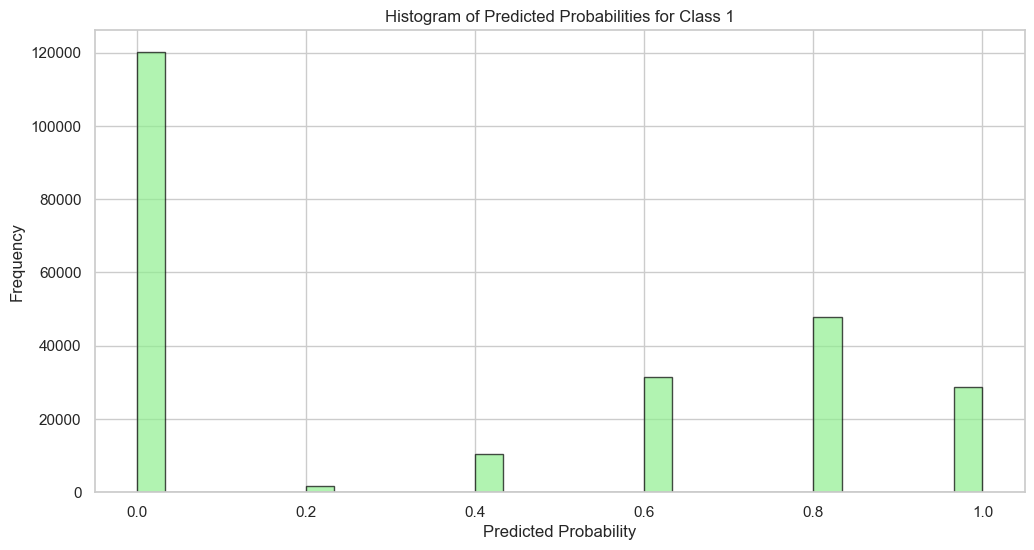

In [83]:
plt.figure(figsize=(12, 6))
plt.hist(y_pred_prob[:, 1], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Histogram of Predicted Probabilities for Class 1")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

## Decision Tree

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset information
print("\nDataset Columns:")
print(data.columns)

target_column = 'E'

if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset!")

# Preprocessing
# Separate features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

# Standardize numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
if not numeric_features.empty:
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Evaluate the model
y_pred = decision_tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Save predictions and summary
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output_df)


Dataset Columns:
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Class', 'AB_interaction'],
      dtype='object')

Mean Squared Error: 0.01
R^2 Score: 0.99
           Actual  Predicted
372605  -0.614906  -0.638928
551204  -0.617110  -0.538083
240320   1.568996   1.483742
1047361 -0.572122  -0.618747
555362  -0.806340  -0.740987
...           ...        ...
458271  -0.744678  -0.705652
1124744 -0.687832  -0.804051
720454  -0.707555  -0.596091
256458  -0.650476  -0.649951
423212   1.399638   1.442531

[240000 rows x 2 columns]


## Visualization

### Feature importance plot

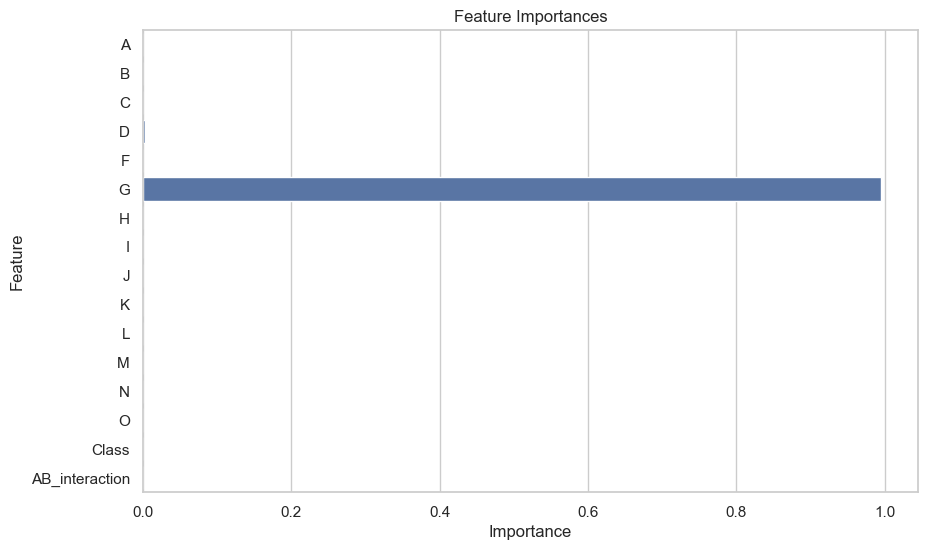

In [87]:
importances = decision_tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Correlation Heatmap

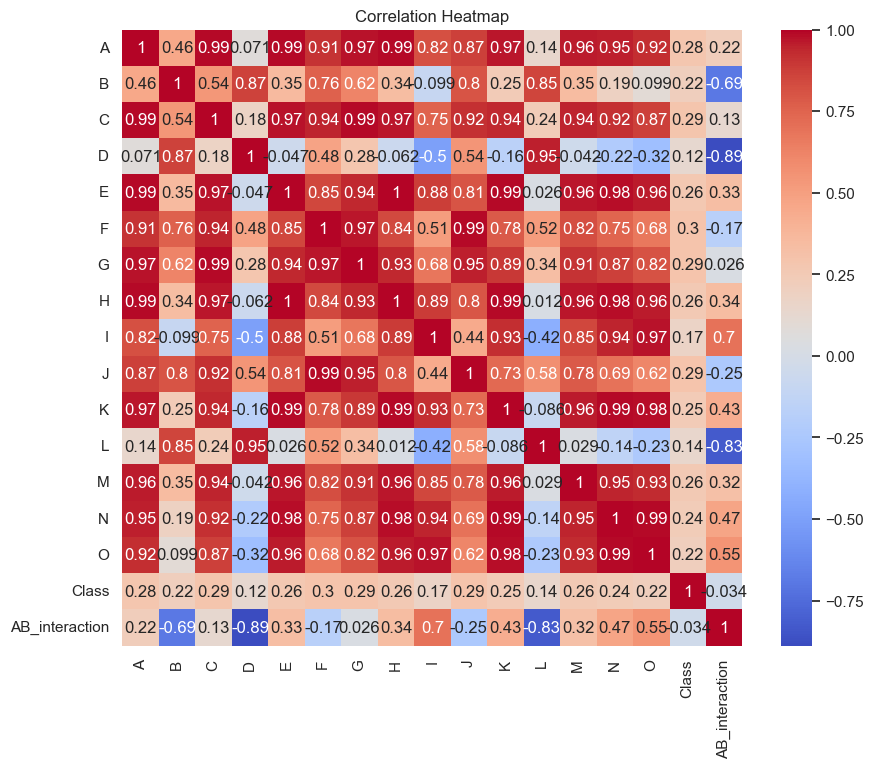

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Validation

In [102]:
pip install skl2onnx onnxruntime scikit-learn numpy

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.3 MB 18.6 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.3 MB 17.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.3 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 17.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------- ----------------------------- 3.7/14.5 MB 19.8 MB/s eta 0:00:01
   -------------------- ------------------- 7.3/14.5 MB 18.9 MB/s eta 0:00:01
   ------------------------------- -------- 11.3/14.5 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------- 14.5/14.5 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
Note: you may need to restart the kernel to use updated packages.


In [91]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import onnxruntime as ort

# Prepare sample data
X = np.array([[0, 0], [1, 1], [2, 2], [3, 3]], dtype=np.float32)
y = np.array([0, 1, 2, 3])

# Initialize models
models = {
    "LinearRegression": LinearRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "DecisionTree": DecisionTreeClassifier(),
    "NaiveBayes": GaussianNB()
}

# Train and convert each model
for name, model in models.items():
    model.fit(X, y)
    initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
    onnx_model = convert_sklearn(model, initial_types=initial_type)
    with open(f"{name}.onnx", "wb") as f:
        f.write(onnx_model.SerializeToString())


In [93]:
def validate_onnx_model(model_path, test_data):
    session = ort.InferenceSession(model_path)
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # Predict using ONNX Runtime
    pred_onnx = session.run([output_name], {input_name: test_data})[0]
    return pred_onnx

# Test data
X_test = np.array([[4, 4], [5, 5], [6, 6]], dtype=np.float32)
y_test = np.array([4, 5, 6])

# Load and validate each ONNX model
model_names = ["LinearRegression", "KNN", "DecisionTree", "NaiveBayes"]
results = {name: validate_onnx_model(f"{name}.onnx", X_test) for name in model_names}

# Print the results
for name, result in results.items():
    print(f"Results from {name}: {result}")


Results from LinearRegression: [[4.]
 [5.]
 [6.]]
Results from KNN: [1 1 1]
Results from DecisionTree: [3 3 3]
Results from NaiveBayes: [3 3 3]


## ONNX Model Generation

In [95]:
# Import necessary libraries
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as ort
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Step 1: Load Dataset
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define and Train the Decision Tree Pipeline
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),             # Preprocessing (optional for Decision Tree)
    #("dt", DecisionTreeClassifier(random_state=42))  # Decision Tree Model
    # ("knn", KNeighborsClassifier(n_neighbors=5))
    # ("lr", LinearRegression())
    ("nb", GaussianNB())
])

pipeline.fit(X_train, y_train)

# Step 3: Convert the Pipeline to ONNX Format
def convert_to_onnx(pipeline, X_train):
    """
    Converts the entire Scikit-Learn pipeline to ONNX format.
    """
    # Define input type for ONNX
    initial_type = [("float_input", FloatTensorType([None, X_train.shape[1]]))]

    # Convert the pipeline to ONNX
    onnx_model = convert_sklearn(pipeline, initial_types=initial_type)

    # Save the ONNX model to a file
    with open("pipeline.onnx", "wb") as f:
        f.write(onnx_model.SerializeToString())
    print("Pipeline successfully converted to ONNX format and saved as 'pipeline.onnx'")
    return "pipeline.onnx"

onnx_file = convert_to_onnx(pipeline, X_train)

# Step 4: Validate the ONNX Model Using ONNX Runtime
def validate_onnx(onnx_file, X_test, y_test):
    """
    Validates the ONNX model using ONNX Runtime and compares predictions.
    """
    # Load the ONNX model
    session = ort.InferenceSession(onnx_file)

    # Get the input name for the ONNX model
    input_name = session.get_inputs()[0].name

    # Convert test data to float32 as ONNX requires it
    X_test_onnx = X_test.astype(np.float32)

    # Run inference with the ONNX model
    onnx_predictions = session.run(None, {input_name: X_test_onnx})[0]

    #Evaluate ONNX predictions
    print("--- ONNX Model Validation ---")
    print(f"ONNX Accuracy: {accuracy_score(y_test, onnx_predictions):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, onnx_predictions))

validate_onnx(onnx_file, X_test, y_test)

Pipeline successfully converted to ONNX format and saved as 'pipeline.onnx'
--- ONNX Model Validation ---
ONNX Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Testing ONNX file

In [97]:
import onnxruntime as ort
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

def execute_onnx_model(onnx_file, X_test, y_test):
    """
    Executes an ONNX model and validates its predictions.
    
    Args:
        onnx_file (str): Path to the ONNX model file.
        X_test (numpy.ndarray): Test features.
        y_test (numpy.ndarray): True labels for test data.
    """
    # Load the ONNX model
    session = ort.InferenceSession(onnx_file)

    # Get the input name and expected shape
    input_name = session.get_inputs()[0].name
    expected_shape = session.get_inputs()[0].shape[1]  # Get the expected number of features
    print(f"Expected input shape: {expected_shape}")

    # Ensure X_test has the correct number of features
    if X_test.shape[1] != expected_shape:
        raise ValueError(f"Mismatch in input dimensions. Test data has {X_test.shape[1]} features, "
                         f"but the model expects {expected_shape} features.")

    # Ensure the test data is in float32 format
    X_test_onnx = X_test.astype(np.float32)

    # Run inference with the ONNX model
    predictions = session.run(None, {input_name: X_test_onnx})[0]

    # Evaluate the predictions
    print("--- ONNX Model Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, np.round(predictions)):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, np.round(predictions)))

# Replace with your actual test dataset and ONNX model path
X_test = np.random.rand(30, 4)  # Ensure this matches the ONNX model's expected features
y_test = np.random.randint(0, 2, 30)  # Replace with your actual test labels
onnx_file = "pipeline.onnx"  # Replace with your ONNX model file path

execute_onnx_model(onnx_file, X_test, y_test)

Expected input shape: 4
--- ONNX Model Evaluation ---
Accuracy: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.31      0.40        16
           1       0.48      0.71      0.57        14

    accuracy                           0.50        30
   macro avg       0.52      0.51      0.49        30
weighted avg       0.52      0.50      0.48        30

